<a href="https://colab.research.google.com/github/kaz-taka-1/2-02_tag/blob/main/5%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os 
project = '100knock-process-visualization'
chapter = 5
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# ５章 画像データの加工・可視化を行う１０本ノック

## ノック６１：画像ファイルを読み込んで表示してみよう

In [33]:
import cv2
img = cv2.imread('data/sample.jpg')
img

array([[[ 8, 10,  4],
        [ 8, 10,  4],
        [ 8, 10,  4],
        ...,
        [47, 69, 45],
        [46, 66, 47],
        [45, 65, 46]],

       [[ 8, 10,  4],
        [ 8, 10,  4],
        [ 8, 10,  4],
        ...,
        [50, 72, 48],
        [49, 70, 48],
        [48, 69, 47]],

       [[ 9, 12,  3],
        [ 9, 12,  3],
        [ 9, 12,  3],
        ...,
        [52, 74, 49],
        [50, 72, 48],
        [48, 70, 46]],

       ...,

       [[20, 48,  5],
        [17, 47,  4],
        [15, 46,  1],
        ...,
        [27, 32, 31],
        [21, 21, 27],
        [15, 14, 23]],

       [[18, 49,  4],
        [17, 48,  3],
        [15, 47,  0],
        ...,
        [27, 31, 25],
        [20, 22, 22],
        [17, 16, 18]],

       [[18, 50,  3],
        [16, 48,  1],
        [12, 46,  0],
        ...,
        [26, 32, 21],
        [21, 22, 18],
        [17, 17, 17]]], dtype=uint8)

In [34]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

## ノック６２：画像データの中身を確認しよう

In [35]:
img.shape

In [36]:
print(img[0])
print(img[0].shape)

In [37]:
print(img[:,0])
print(img[:,0].shape)

In [38]:
print(img[:,:,0])
print(img[:,:,0].shape)

## ノック６３：画像データを切り出してみよう

In [39]:
img_extract = img[700:1200,300:800,:]
cv2_imshow(img_extract)

In [40]:
cv2_imshow(img_extract[:,:,0])

In [41]:
cv2_imshow(img_extract[:,:,1])

## ノック６４：カラーヒストグラムを可視化してみよう

In [42]:
hist_b = cv2.calcHist([img],channels=[0],mask=None,histSize=[356],ranges=[0,256])
print(hist_b.shape)
hist_b[:5]

In [43]:
hist_g = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_r = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

import matplotlib.pyplot as plt
plt.plot(hist_r,color='r',label="Red")
plt.plot(hist_g,color='g',label="Green")
plt.plot(hist_b,color='b',label="Blue")
plt.legend()
plt.show()

## ノック６５：RGB変換を行って画像を表示してみよう

In [44]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_rgb.shape

In [ ]:
cv2_imshow(img_rgb)

In [ ]:
plt.imshow(img_rgb)

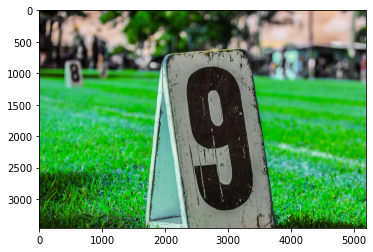

In [61]:
plt.imshow(img)

## ノック６６：画像のサイズを変更してみよう

In [ ]:
height,width,channels = img.shape
print(width,height)

In [ ]:
img_resized = cv2.resize(img,(500,300))
print(img_resized.shape)
cv2_imshow(img_resized)

In [ ]:
img_resized = cv2.resize(img,(300,500))
print(img_resized.shape)
cv2_imshow(img_resized)

In [ ]:
img_resized = cv2.resize(img,None, fx=0.1,fy=0.1)
print(img_resized.shape)
cv2_imshow(img_resized)

In [ ]:
img_resized_2 = cv2.resize(img,None, fx=1.5,fy=1.5)
print(img_resized_2.shape)
cv2_imshow(img_resized_2)

In [ ]:
img_resized_2 = cv2.resize(img_resized,None, fx=1.5,fy=1.5,interpolation=cv2.INTER_NEAREST)
print(img_resized_2.shape)
cv2_imshow(img_resized_2)

## ノック６７：画像を回転させてみよう

In [ ]:
cv2_imshow(img_resized)
print(img_resized.shape)

In [ ]:
img_rotated=cv2.rotate(img_resized,cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(img_rotated)
print(img_rotated.shape)

In [ ]:
height,width=img_resized.shape[:2]
center=(int(width/2),int(height/2))

rot=cv2.getRotationMatrix2D(center,45,1)
img_rotated=cv2.warpAffine(img_resized,rot,(width,height))
cv2_imshow(img_rotated)
print(img_rotated)

In [ ]:
img_reverse=cv2.flip(img_resized,0)
cv2_imshow(img_reverse)
print(img_reverse.shape)

In [ ]:
img_reverse=cv2.flip(img_resized,1)
cv2_imshow(img_reverse)
print(img_reverse.shape)

In [ ]:
img_reverse = img_resized[:, ::-1, :]
cv2_imshow(img_reverse)
print(img_reverse.shape)

## ノック６８：画像処理をしてみよう

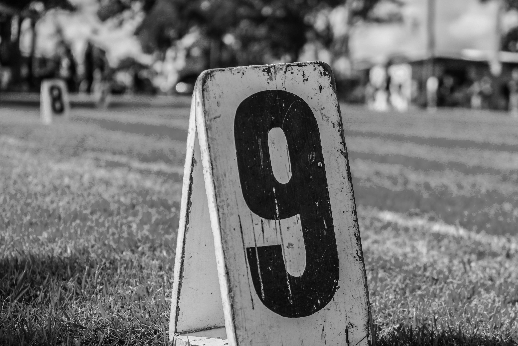

(346, 518)


In [62]:
img_gray=cv2.cvtColor(img_resized,cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)
print(img_gray.shape)

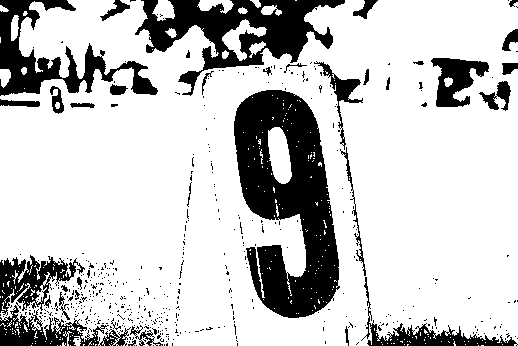

(346, 518)
60.0


In [63]:
th,img_th=cv2.threshold(img_gray,60,255,cv2.THRESH_BINARY)
cv2_imshow(img_th)
print(img_th.shape)
print(th)

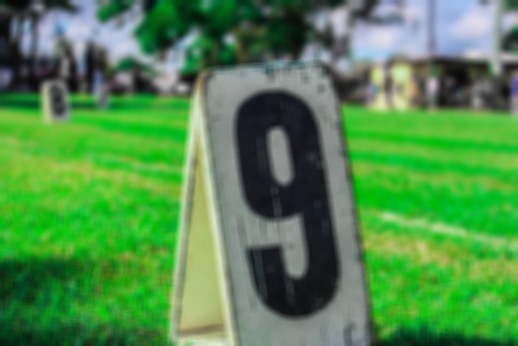

(346, 518, 3)


In [65]:
img_smoothed=cv2.blur(img_resized,(8,8))
cv2_imshow(img_smoothed)
print(img_smoothed.shape)

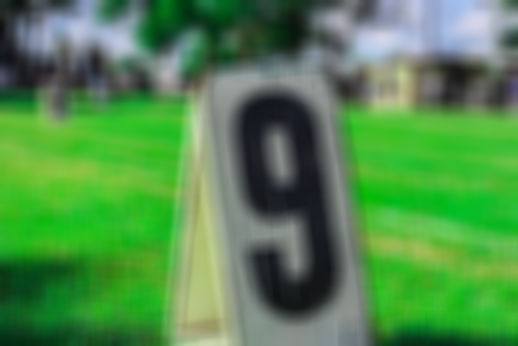

(346, 518, 3)


In [66]:
img_smoothed=cv2.blur(img_resized,(20,20))
cv2_imshow(img_smoothed)
print(img_smoothed.shape)

## ノック６９：画像にテキストや線を描画してみよう

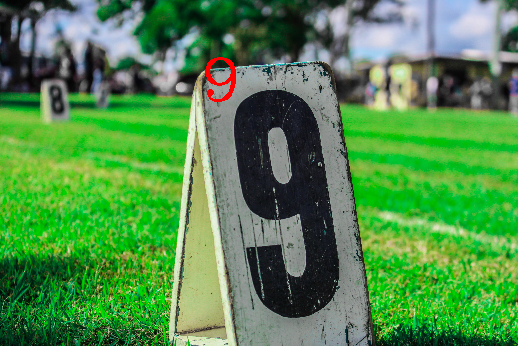

In [70]:
text='9'
xy=(200,100)
font=cv2.FONT_HERSHEY_COMPLEX
font_scale=2
color=(0,0,255)
thickness = 2

img_text=cv2.putText(img_resized.copy(),text,xy,font,font_scale,color,thickness)
cv2_imshow(img_text)

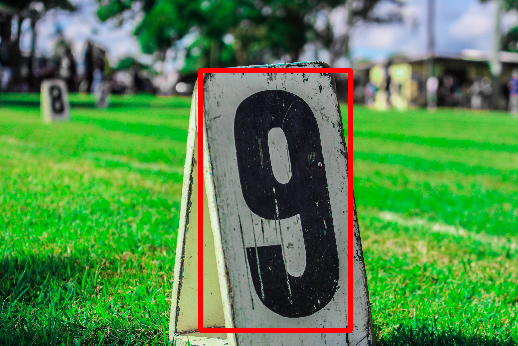

In [72]:
x0,y0 = 200,70
x1,y1 = 350,330
color=(0,0,255)
thickness=3

img_rect=cv2.rectangle(img_resized.copy(),(x0,y0),(x1,y1),color,thickness)
cv2_imshow(img_rect)

## ノック７０：画像を保存してみよう